# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [16]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



Уровень преступности по городам - экспоненциальное распределение


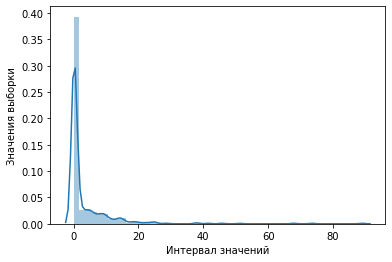

In [9]:
# 1 столбец
crim = data.CRIM
# plt.hist(crim, 30)
sns.distplot(crim)
plt.xlabel('Интервал значений')
plt.ylabel('Значения выборки')
# Экспоненциальное распределение

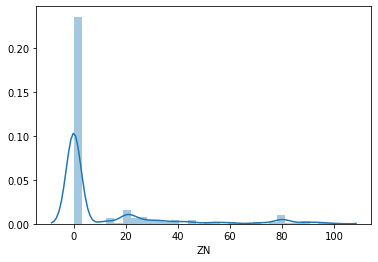

In [20]:
# 2 столбец
zn = data.ZN
sns.distplot(zn)
# Экспоненциальное распределение

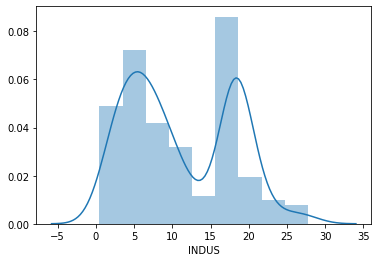

In [21]:
# 3 столбец
sns.distplot(data.INDUS)
# Нет определенной зависимости

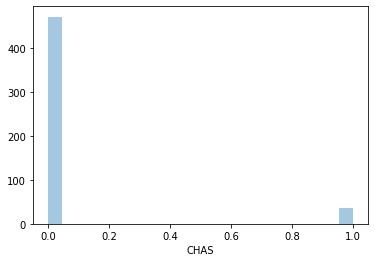

In [23]:
# 4 столбец
sns.distplot(data.CHAS, kde=False)
# Распределение Бернулли

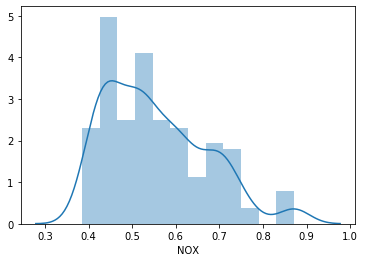

In [24]:
# 5 столбец
sns.distplot(data.NOX)
# Распределение Пуассона

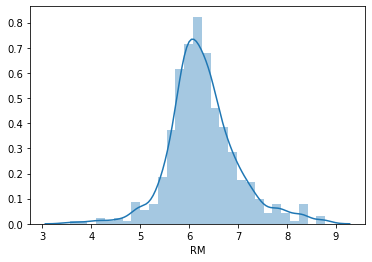

In [25]:
# 6 столбец
sns.distplot(data.RM)
# Нормальное распределение

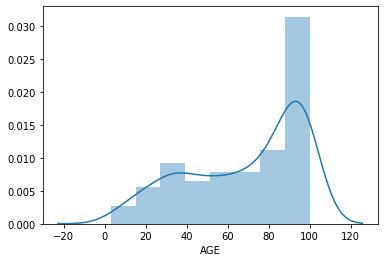

In [26]:
# 7 столбец
sns.distplot(data.AGE)

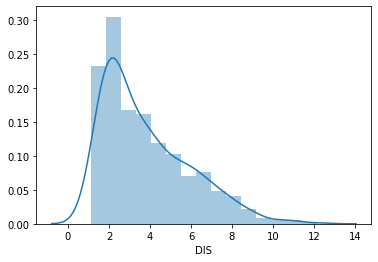

In [27]:
# 8 столбец
sns.distplot(data.DIS)
# Логнормальное распределение

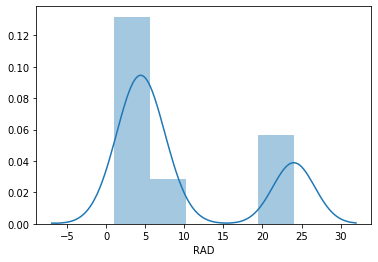

In [28]:
# 9 столбец
sns.distplot(data.RAD)
# Нет определенной зависимости

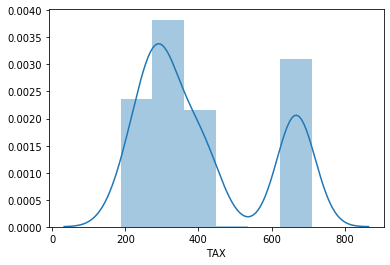

In [29]:
# 10 столбец
sns.distplot(data.TAX)
# Нет определенной зависимости

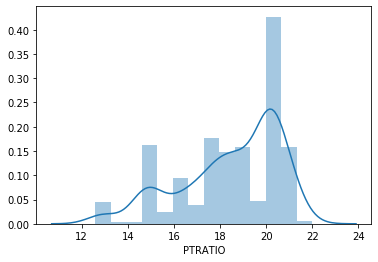

In [30]:
# 11 столбец
sns.distplot(data.PTRATIO)
# ВОзможно

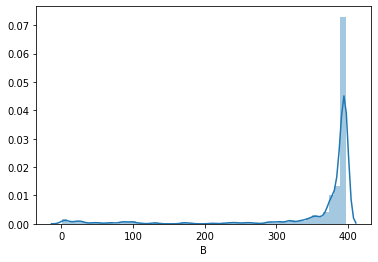

In [31]:
# 12 столбец
sns.distplot(data.B)
# Экспоненциальное распределение

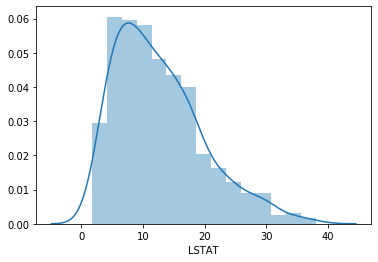

In [32]:
# 13 столбец
sns.distplot(data.LSTAT)
# Распределение Стьюдента

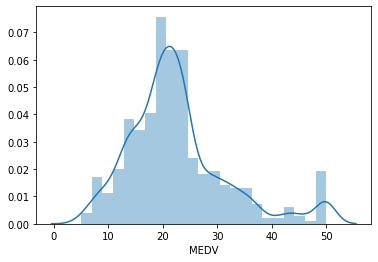

In [33]:
# 14 столбец
sns.distplot(data.MEDV)
# Нормальное распределение

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

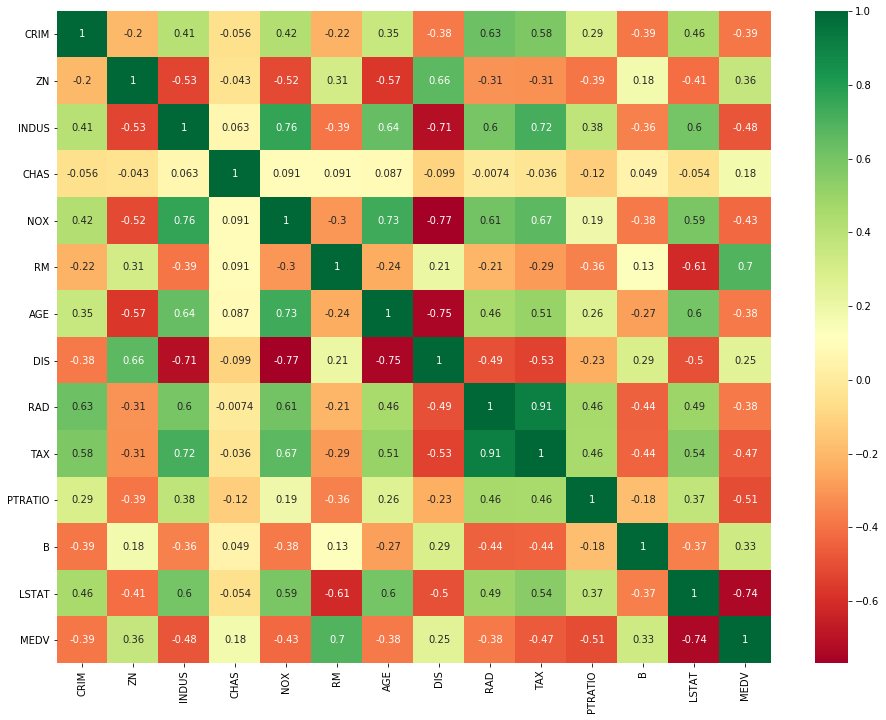

In [149]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
fig = plt.gcf()
fig.set_size_inches(16, 12)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



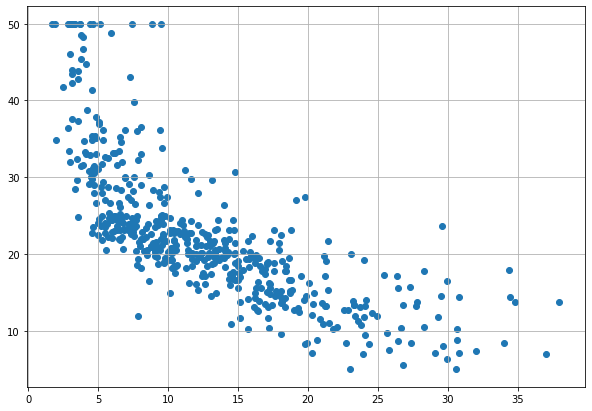

In [196]:
plt.scatter(data.LSTAT, data.MEDV)
plt.grid()

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
lstat = np.array(data.LSTAT).reshape(-1, 1)
medv = np.array(data.MEDV).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(lstat, medv, test_size=0.2)

Зависимость стоимости дома от количества необеспеченых семей имеет относительную линейную зависимость, 
 распределение точек лучше будет апроксимировать функцией 1/x
Уравнение линейной функции имеет вид y = -0.9599889571145958(x) + 34.699240869192096


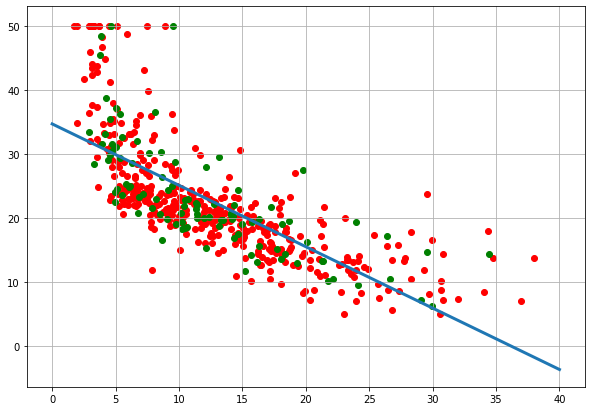

In [305]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 7]
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
x = np.linspace(0, 40, 506)
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_test, y_test, color='green')
y = model.coef_*x + model.intercept_
plt.plot(x, y[0], linewidth=3)
plt.grid()
print('Зависимость стоимости дома от количества необеспеченых семей имеет относительную линейную зависимость, \n распределение точек лучше будет апроксимировать функцией 1/x')
print('Уравнение линейной функции имеет вид y = %s(x) + %s' % (model.coef_[0][0], model.intercept_[0]))

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [276]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"

data=pd.read_csv(url)

data.cov()



,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [278]:
print('В данном наборе данных %s строк с пустыми значениями' % (data.isna().count()[0]))
data = data.dropna()

В данном наборе данных 156 строк с пустыми значениями


Сколько стран в выборке? Написать ответ. 

In [279]:
print('Количество стран в выборке: %s' % (len(data['Country (region)'].unique())))

Количество стран в выборке: 140


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [281]:
# names = ["Мера удовлетворенности", "Позитивный эффект", "Негативный эффект", "Социальная поддержка", 
#          "Уровень свободы", "Уровень коррупции", "Щедрость", "Коэф. влияния уровня щедрости при расчете уровня счастья",
#          "Уровень здровой жизни"]
data.corr().style.background_gradient(cmap='PuBu').set_precision(2)

# Выводы: 1) Уровень коррупции практически не влияет ни на один из параметров разве что если бы в выборке были только бедные страны
#         2) Уровень соц. поддержки положительно сказывается на уровень счачтья жителей

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.00,0.56,0.51,0.54,0.83,0.55,0.22,0.49,0.82,0.83
SD of Ladder,0.56,1.00,0.09,0.63,0.60,0.25,0.25,0.39,0.66,0.64
Positive affect,0.51,0.09,1.00,0.35,0.43,0.70,0.23,0.42,0.31,0.34
Negative affect,0.54,0.63,0.35,1.00,0.67,0.42,0.17,0.35,0.57,0.51
Social support,0.83,0.60,0.43,0.67,1.00,0.48,0.15,0.45,0.80,0.76
Freedom,0.55,0.25,0.70,0.42,0.48,1.00,0.41,0.50,0.39,0.42
Corruption,0.22,0.25,0.23,0.17,0.15,0.41,1.00,0.28,0.19,0.15
Generosity,0.49,0.39,0.42,0.35,0.45,0.50,0.28,1.00,0.46,0.45
Log of GDP per capita,0.82,0.66,0.31,0.57,0.80,0.39,0.19,0.46,1.00,0.87
Healthy life expectancy,0.83,0.64,0.34,0.51,0.76,0.42,0.15,0.45,0.87,1.00


# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [134]:
array = []
toss_up = np.arange(1, 7)
for i in range(100):
    np.random.shuffle(toss_up)
    array.append(toss_up[0])

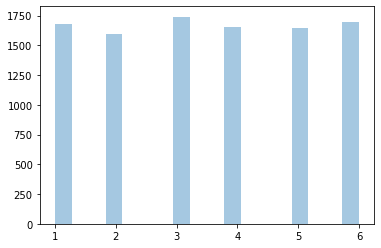

In [99]:
sns.distplot(array, kde=False)
# При 10 подбрасыванях не очевиден вид распределения, но при 10000 картина очевидна - 
# распределние Бернулли для случая с 6-ю элементами

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [303]:
massive = []
distribution = []
toss = np.arange(1, 7)
for i in range(1000):
    for n in range(100):
        np.random.shuffle(toss)
        massive.append(toss[0])
    distribution.append(sum(massive))
    massive.clear()

350

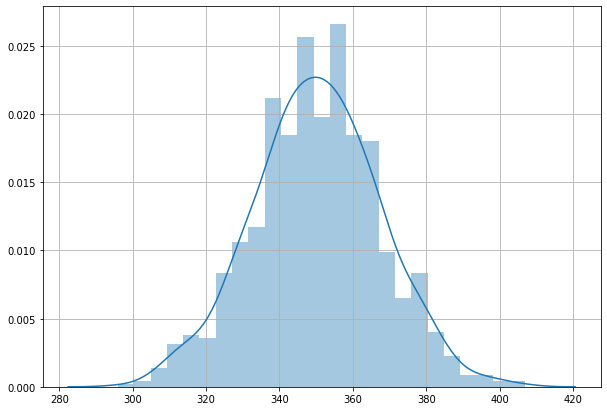

In [304]:
sns.distplot(distribution)
plt.grid()
# Нормальное распределение
# Сумма костей на гранях кубика может варьироваться в каждой выборке из 100 подбрасываний, но при большом количестве
# повторении эксперимента всегда будет стремиться к среднеарифметическому * на количество подбрасываний
# (1 + 2 +3 + 4 + 5 + 6) / 6 * 100 = 3,5 *100 = 350
import statistics
statistics.mean(distribution)